In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
import warnings
warnings.filterwarnings('ignore') 
from wordcloud import WordCloud, STOPWORDS

# Data Pre Processing

In [31]:

df=pd.read_csv('data.csv')
df=df.dropna()
df

id      Place Weather  Number of vehicles  Speed of vehicles  \
0           1   Shivpuri  cloudy                  41                 95   
1           2  Bagepalli   rainy                  85                 30   
2           3     Kadapa   sunny                  29                 67   
3           4      Gudur  cloudy                  30                 42   
4           5  Lakhnadon   rainy                  14                 93   
...       ...        ...     ...                 ...                ...   
99995   99996  Bagepalli   sunny                  75                 95   
99996   99997     Palasa   snowy                  66                 67   
99997   99998   Sujanpur   sunny                  89                 79   
99998   99999    Mundhal   sunny                  40                 62   
99999  100000    Deogarh   sunny                  67                 89   

             Events Road Quality Traffic  
0          accident         fair     low  
1          accident         good    high  
2              none         poor     low  
3      construction         poor     low  
4          accident         poor     low  
...             ...          ...     ...  
99995      accident         fair     low  
99996  construction         fair    high  
99997  construction         poor     low  
99998  construction         poor     low  
99999      accident         good     low  

[100000 rows x 8 columns]

In [32]:
df.describe()

id  Number of vehicles  Speed of vehicles
count  100000.000000        100000.00000      100000.000000
mean    50000.500000            55.11229          64.987360
std     28867.657797            26.30180          20.519564
min         1.000000            10.00000          30.000000
25%     25000.750000            32.00000          47.000000
50%     50000.500000            55.00000          65.000000
75%     75000.250000            78.00000          83.000000
max    100000.000000           100.00000         100.000000

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   Place               100000 non-null  object
 2   Weather             100000 non-null  object
 3   Number of vehicles  100000 non-null  int64 
 4   Speed of vehicles   100000 non-null  int64 
 5   Events              100000 non-null  object
 6   Road Quality        100000 non-null  object
 7   Traffic             100000 non-null  object
dtypes: int64(3), object(5)
memory usage: 6.1+ MB


## Data cleaning

In [34]:
df.isna().sum()

id                    0
Place                 0
Weather               0
Number of vehicles    0
Speed of vehicles     0
Events                0
Road Quality          0
Traffic               0
dtype: int64

In [35]:
df.dropna(inplace=True)
df.isna().sum()

id                    0
Place                 0
Weather               0
Number of vehicles    0
Speed of vehicles     0
Events                0
Road Quality          0
Traffic               0
dtype: int64

## Data visualization

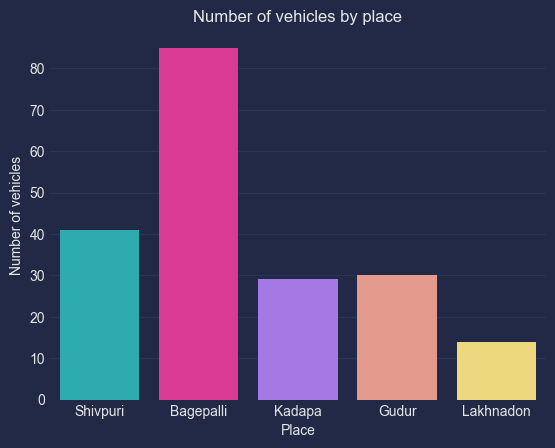

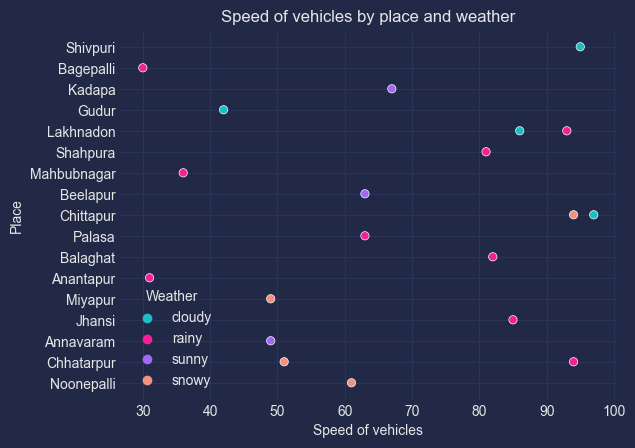

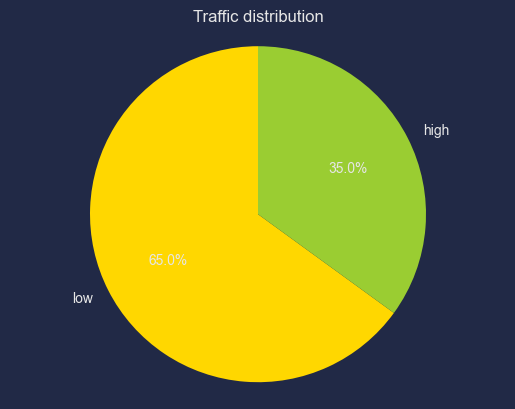

In [36]:
# Create a bar chart for the number of vehicles
dff=df[:5]
sns.barplot(x='Place', y='Number of vehicles', data=dff)
plt.title('Number of vehicles by place')
plt.show()


dff=df[:20]
# Create a scatter plot for the speed of vehicles
sns.scatterplot(x='Speed of vehicles', y='Place', hue='Weather', data=dff)
plt.title('Speed of vehicles by place and weather')
plt.show()

# Create a pie chart for the traffic
traffic_counts = dff['Traffic'].value_counts()
labels = traffic_counts.index.tolist()
sizes = traffic_counts.tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Traffic distribution')
plt.show()

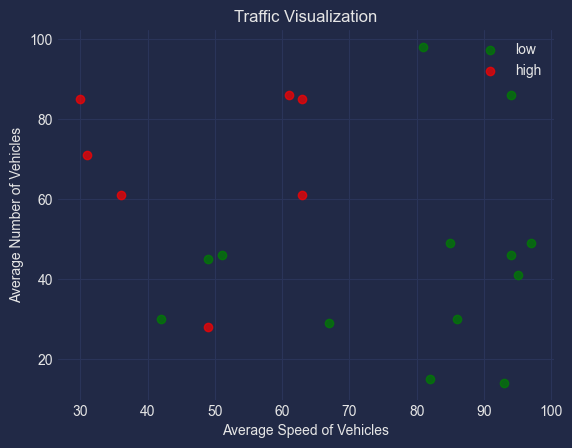

In [37]:
# Compute the average number of vehicles and speed of vehicles
avg_num_vehicles = dff.groupby(['Speed of vehicles'])['Number of vehicles'].mean()

# Define the colors for each traffic level
traffic_colors = {'low': 'green', 'high': 'red'}

# Create the scatter plot
fig, ax = plt.subplots()
for traffic_level in dff['Traffic'].unique():
    ax.scatter(
        dff[dff['Traffic'] == traffic_level]['Speed of vehicles'], 
        dff[dff['Traffic'] == traffic_level]['Number of vehicles'], 
        color=traffic_colors[traffic_level], 
        label=traffic_level,
        alpha=0.7
    )

# Add axis labels and title
ax.set_xlabel('Average Speed of Vehicles')
ax.set_ylabel('Average Number of Vehicles')
ax.set_title('Traffic Visualization')

# Add legend
ax.legend()

# Display the plot
plt.show()

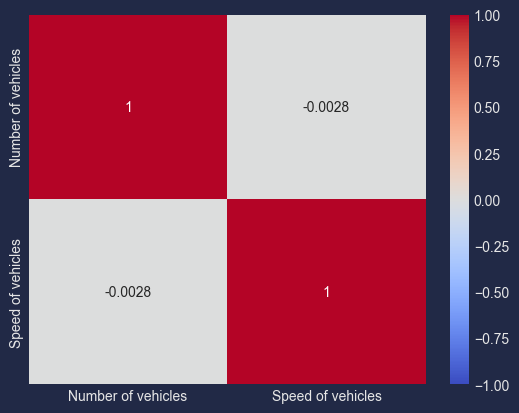

In [38]:
# Map traffic values to numeric
traffic_mapping = {'low': 0, 'moderate': 1, 'high': 2}
df['Traffic'] = df['Traffic'].map(traffic_mapping)

# Calculate correlation matrix
corr = df[['Number of vehicles', 'Speed of vehicles']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

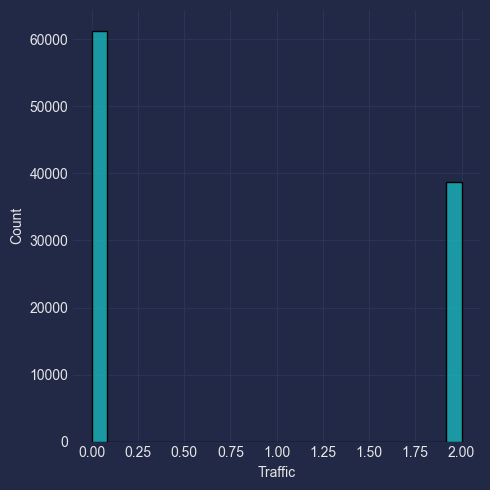

In [39]:
sns.displot(df["Traffic"])

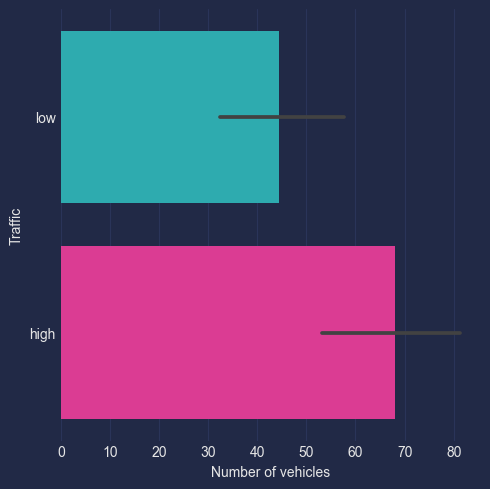

In [40]:
sns.catplot(data=dff, x="Number of vehicles", y="Traffic", kind="bar")

<AxesSubplot: xlabel='Number of vehicles', ylabel='Traffic'>

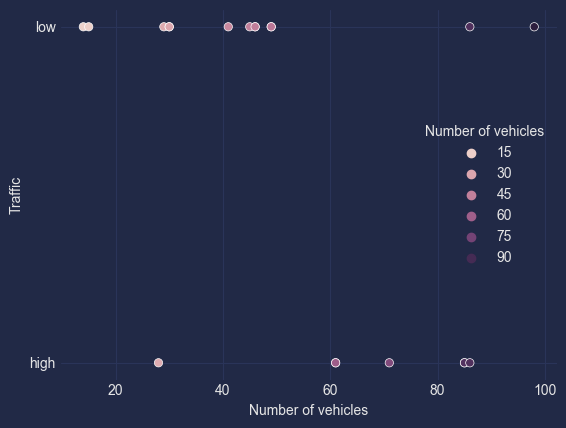

In [41]:
sns.scatterplot(data=dff, x="Number of vehicles", y="Traffic", hue="Number of vehicles")

## MODEL SELECTION

In [42]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the data from a CSV file
data = pd.read_csv('data.csv')

# Define the features and target
features = ['Number of vehicles', 'Speed of vehicles', 'Weather']
target = 'Traffic'

# Encode the 'Weather' feature
le = LabelEncoder()
data['Weather'] = le.fit_transform(data['Weather'])

In [43]:
# Define the conditions for the decision tree
conditions = [
    data['Number of vehicles'] < 30,
    (data['Number of vehicles'] >= 30) & (data['Number of vehicles'] < 50),
    data['Number of vehicles'] >= 50,
    data['Speed of vehicles'] < 50,
    (data['Speed of vehicles'] >= 50) & (data['Speed of vehicles'] < 70),
    data['Speed of vehicles'] >= 70,
    ((data['Speed of vehicles'] < 50) & (data['Number of vehicles'] < 30)),
    data['Weather'] == 0,  # rainy
    data['Weather'] == 1,  # sunny
    data['Weather'] == 2   # cloudy
]


## Decision Tree Model

In [44]:
# Define the predicted traffic levels for each condition
predictions = ['High Traffic', 'Low Traffic', 'High Traffic', 'High Traffic', 'Moderate Traffic', 'Low Traffic', 'High Traffic',
               'Low Traffic', 'Moderate Traffic', 'High Traffic']

# Build the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(data[features], data[target])

# Test the accuracy of the classifier
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=0)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [47]:
print('Accuracy is :', accuracy*100,"%")

Accuracy is : 100.0 %


In [54]:
# Make predictions on new data
new_data = pd.DataFrame({
    'Number of vehicles': [10],
    'Speed of vehicles': [70],
    'Weather': ['sunny']
})

# Encode the 'Weather' feature for new data
new_data['Weather'] = le.transform(new_data['Weather'])

predictions = clf.predict(new_data[features])
print('Predictions:', predictions)

Predictions: ['low' 'high']


# Random Forest Model

In [57]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def build_model(city):
    # Load the data from a CSV file
    data = pd.read_csv('data.csv')

    # Define the features and target
    features = ['Number of vehicles', 'Speed of vehicles', 'Weather']
    target = 'Traffic'

    # Encode the 'Weather' feature
    le = LabelEncoder()
    data['Weather'] = le.fit_transform(data['Weather'])

    # Define the conditions for the decision tree
    conditions = [
        data['Number of vehicles'] < 30,
        (data['Number of vehicles'] >= 30) & (data['Number of vehicles'] < 50),
        data['Number of vehicles'] >= 50,
        data['Speed of vehicles'] < 50,
        (data['Speed of vehicles'] >= 50) & (data['Speed of vehicles'] < 70),
        data['Speed of vehicles'] >= 70,
        ((data['Speed of vehicles'] < 50) & (data['Number of vehicles'] < 30)),
        data['Weather'] == 0,  # rainy
        data['Weather'] == 1,  # sunny
        data['Weather'] == 2   # cloudy
    ]

    # Define the predicted traffic levels for each condition
    predictions = ['High Traffic', 'Low Traffic', 'High Traffic', 'High Traffic', 'Moderate Traffic', 'Low Traffic', 'High Traffic','Low Traffic', 'Moderate Traffic', 'High Traffic']

    # Build the random forest classifier
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(data[features], data[target])

    # Test the accuracy of the classifier
    X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=0)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)
    
    # Make predictions on new data
    new_data = pd.DataFrame({
        'Number of vehicles': [60],
        'Speed of vehicles': [30],
        'Weather': ['rainy']
    })

    # Encode the 'Weather' feature for new data
    new_data['Weather'] = le.transform(new_data['Weather'])

    predictions = clf.predict(new_data[features])
    print('Predictions:', predictions)


# Prediction

In [58]:
build_model("delhi")

Accuracy: 1.0
Predictions: ['high']
